#**VIT-Vellore SCOPE**
---
##**CSE6037 - Deep Learning and its Applications**
---
###**SUTHAR MANAN BHARATKUMAR 20MAI0016**
###Assessment 1

## ***Problem 3***
*Image Classifier using simple SVM.*

In [46]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
import cv2
%matplotlib notebook

### Loading the images form local file system

* Loading the dataset of images from a local system where they are stored in seperate folders for each class and also train and test images altogeather.

In [47]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [48]:
image_dataset = load_image_files("../input/xyzyuiyi/img_dataset")

In [49]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### Feature Extraction from images

<IPython.core.display.Javascript object>


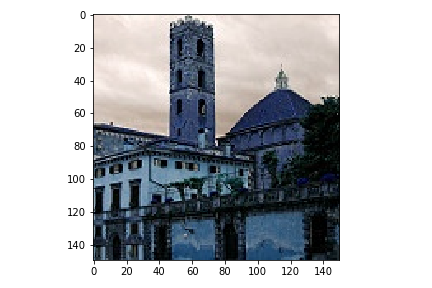

In [50]:
from skimage.io import imread, imshow
from skimage import filters
image1 = cv2.imread('../input/xyzyuiyi/img_dataset/buildings/20061.jpg')
imshow(image1)

<IPython.core.display.Javascript object>


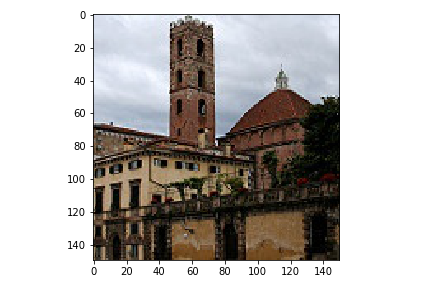

In [51]:
from skimage.io import imread, imshow
image2 = imread('../input/xyzyuiyi/img_dataset/buildings/20061.jpg', 0)
imshow(image2)

* ***Analyzing both the images***

Shape and Size of the image(i.e. the number of pixels in the img)


In [52]:
print("Color image will have 3 layers namely R, G, B so the shape is",image1.shape)
print("Gray scale image only has a single layer so its shape is",image2.shape)
print("Size of the RGB image is", image1.size)
print("Size of the gray scale is", image2.size)

Color image will have 3 layers namely R, G, B so the shape is (150, 150, 3)
Gray scale image only has a single layer so its shape is (150, 150, 3)
Size of the RGB image is 67500
Size of the gray scale is 67500


* ***Pixel Features*** 


The number of pixels in an image is the same as the size of the image for grayscale images we can find the pixel features by reshaping the shape of the image and returning the array form of the image.

In [57]:
print("Color image:",np.reshape(image2, (225 * 100 * 3)))

Color image: [227 233 247 ...  49  45  34]


* ***Region-Based Segmentation***

We use this segment object from a background. We will use our image and try region-based segmentation on it.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


<IPython.core.display.Javascript object>


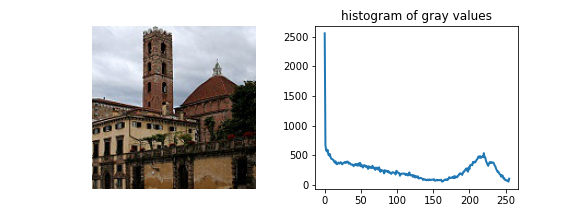

Text(0.5, 1.0, 'histogram of gray values')

In [58]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image2)
#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image2, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [59]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [60]:
y_pred = clf.predict(X_test)

In [61]:
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.41      0.54      0.47        13
           1       0.46      0.33      0.39        18
           2       0.46      0.55      0.50        22
           3       0.08      0.07      0.07        15
           4       0.73      0.73      0.73        15
           5       0.50      0.50      0.50        16

    accuracy                           0.45        99
   macro avg       0.44      0.45      0.44        99
weighted avg       0.45      0.45      0.45        99


